In [48]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Context

In [49]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

In [50]:
# Простая сводная статистика по столбцам в таблице 
types_columns = train_data.dtypes
summary_data = train_data.describe()

#Cписок уникальных значений(имён) и частота их появления в наборе данных
unique_name = train_data.Name.unique()
occur_name = train_data.Name.value_counts()

In [51]:
types_columns

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [52]:
summary_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [53]:
unique_name

array(['Oconnor, Frankie', 'Bryan, Drew', 'Owens, Kenneth', ...,
       'Childress, Charles', 'Caughlin, Thomas', 'Enciso, Tyler'],
      dtype=object)

In [54]:
occur_name

Johnson, John        31
Smith, James         24
Smith, John          24
Johnson, William     22
Smith, Michael       20
                     ..
Davis, Andre          1
Rosenblum, Ronald     1
Landry, Ernesto       1
Mcdonald, Frances     1
Enciso, Tyler         1
Name: Name, Length: 92144, dtype: int64

In [55]:
#Выборка данных со значением NaN
null_name_value = train_data[pd.isnull(train_data.Age)]
null_cabin_value = train_data[pd.isnull(train_data.Cabin)]

total_sum = len(train_data)

missing_age_sum = train_data.Age.isnull().sum()
missing_cabin_sum = train_data.Cabin.isnull().sum()

In [56]:
null_name_value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
34,34,1,2,"Mcmullen, Delores",female,NaN,0,0,15940,33.66,NaN,C
35,35,0,3,"Hall, Booker",male,NaN,0,0,422605,5.77,NaN,C
36,36,1,1,"Crowder, Nicole",female,NaN,0,0,341631,60.02,C19277,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
99772,99772,0,1,"Hash, William",male,NaN,0,2,26338,107.30,B21753,C
99876,99876,1,3,"Maresco, Michael",male,NaN,0,0,410800,22.64,NaN,C
99971,99971,0,3,"Teague, Robert",male,NaN,0,0,PP 12794,7.78,NaN,S
99972,99972,0,3,"Gordon, Chad",male,NaN,0,0,12159,6.19,NaN,Q


In [57]:
null_cabin_value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,99994,0,2,"Stevens, Clinton",male,36.00,0,0,41343,12.14,NaN,S
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [58]:
missing_age_sum, total_sum

(3292, 100000)

In [59]:
missing_cabin_sum, total_sum

(67866, 100000)

In [60]:
# DataFrame, индекс = категория 'Sex', а минимальное и максимальное значения = 'Fare'. 
fare_sex = train_data.groupby(['Sex']).Fare.agg([len, min, max])

# DataFrame, индекс = категория 'Embarked', а минимальное и максимальное значения = 'Fare'. 
fare_embarked = train_data.groupby(['Embarked']).Fare.agg([len, min, max])

# DataFrame, индекс = категория 'Pclass', а минимальное и максимальное значения = 'Fare'. 
fare_pclass = train_data.groupby(['Pclass']).Fare.agg([len, min, max])

# DataFrame, индекс = категория 'Name', а среднее значение = 'Fare'. 
name_mean_fare = train_data.groupby('Name').Fare.mean()

# DataFrame, индекс = категория 'SibSp', а минимальное и максимальное значения = 'Fare'.
fare_sibSp = train_data.groupby(['SibSp']).Fare.agg([len, min, max])

# DataFrame, индекс = категория 'Parch', а минимальное и максимальное значения = 'Fare'.
fare_parch = train_data.groupby(['Parch']).Fare.agg([len, min, max])

# DataFrame, индекс = категория 'Embarked', вторая колонка = 'Survived'.
survived_embarked = train_data.groupby('Embarked').Survived.count()

In [61]:
fare_sex, fare_embarked , fare_pclass, name_mean_fare, fare_sibSp, fare_parch, survived_embarked

(          len   min     max
 Sex                        
 female  43886  1.61  744.46
 male    56114  0.68  744.66,
             len   min     max
 Embarked                     
 C         22187  1.51  744.46
 Q          5424  2.29  744.66
 S         72139  0.68  727.65,
           len   min     max
 Pclass                     
 1       30315  3.38  744.66
 2       28679  1.72  613.43
 3       41006  0.68  640.79,
 Name
 Aaberg, Melvin       21.96
 Aadland, Chelsea     26.14
 Aadland, Eileen      11.41
 Aaron, David         63.43
 Aaron, Frederick     32.28
                      ...  
 Zych, Alfred          5.33
 Zych, Maria          62.71
 Zymowski, Russell    12.04
 Zywiec, Manuel        8.55
 Zywiec, Rebecca       6.57
 Name: Fare, Length: 92144, dtype: float64,
          len   min     max
 SibSp                     
 0      73308  0.68  744.66
 1      19758  3.17  732.01
 2       3703  3.89  614.92
 3       1635  3.98  583.17
 4       1168  5.29  516.75
 5        132  6.39  548.09

# Data exploration

Text(0, 0.5, 'Price(min)')

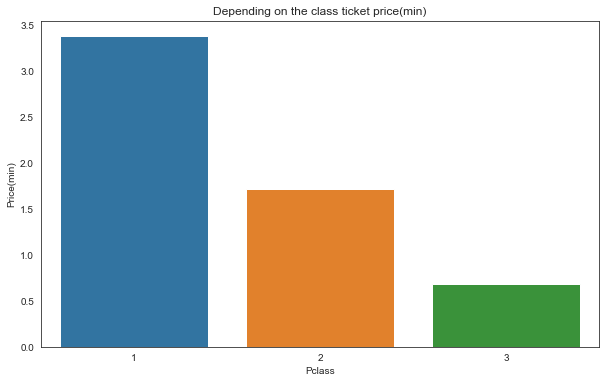

In [62]:
plt.figure(figsize=(10,6))
plt.title("Depending on the class ticket price(min)")
sns.barplot(x=fare_pclass.index, y=fare_pclass['min'])
plt.ylabel("Price(min)")

Text(0, 0.5, 'Price(min)')

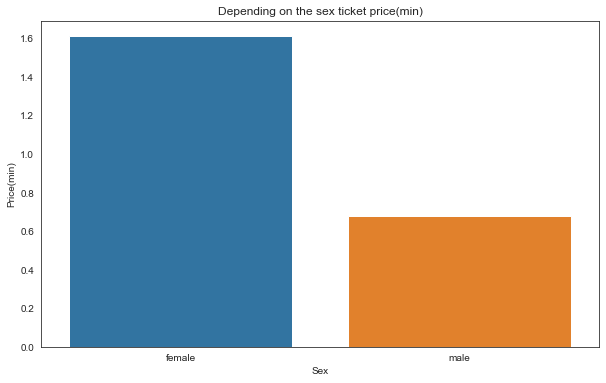

In [63]:
plt.figure(figsize=(10,6))
plt.title("Depending on the sex ticket price(min)")
sns.barplot(x=fare_sex.index, y=fare_sex['min'])
plt.ylabel("Price(min)")

<AxesSubplot:title={'center':'Survival depending on the embarked'}, xlabel='Embarked'>

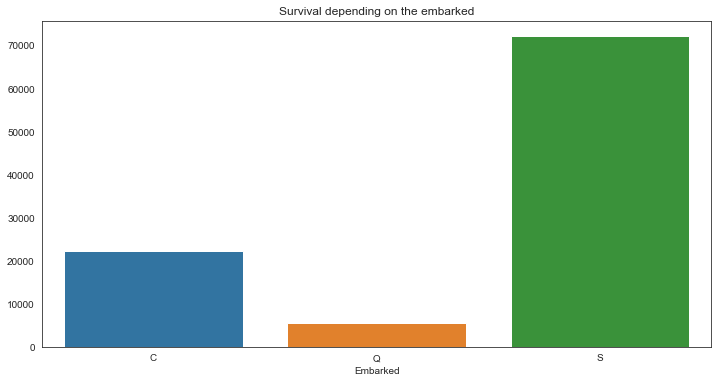

In [64]:
plt.figure(figsize=(12,6))
plt.title("Survival depending on the embarked")
sns.barplot(x=survived_embarked.index, y=survived_embarked.array)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

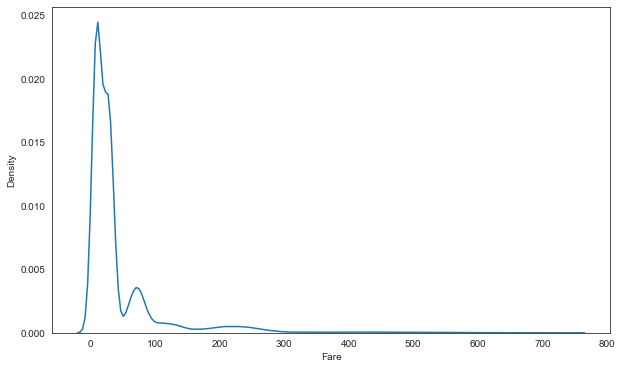

In [65]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=train_data['Fare'])

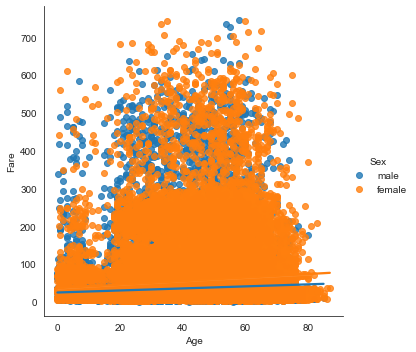

In [66]:
#Распределение цены билетов в зависимости от возраста и пола"
sns.lmplot(x="Age", y="Fare", hue="Sex", data=train_data)

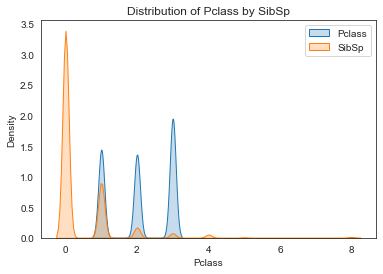

In [67]:
sns.kdeplot(data=train_data['Pclass'], label="Pclass", shade=True)
sns.kdeplot(data=train_data['SibSp'], label="SibSp", shade=True)

plt.title("Distribution of Pclass by SibSp")
plt.legend()

<AxesSubplot:title={'center':'Survival depending on the sex'}, xlabel='Sex'>

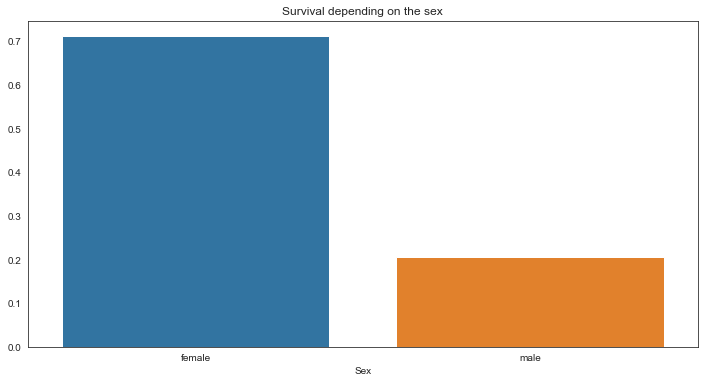

In [68]:
def survive_chance(data):
    return (data == 1).sum()/len(data)

survived_male_female=train_data.groupby('Sex').Survived.agg(survive_chance)

plt.figure(figsize=(12,6))
plt.title("Survival depending on the sex")
sns.barplot(x=survived_male_female.index, y=survived_male_female.array)

# Summary

После анализа данных из таблицы train_data и построения различных графиков с выборочными данными можно сделать следующие заключения:
1. Шанс выживания женщин больше чем у мужчин.
2. Большинство билетов были дешёвыми, но встречаются и очень дорогие билеты (Heavy-tailed distribution).
3. Большой процент данных по кабинам(Cabin) отсутствует, а так же не хватает данных для возраста(Age).